In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

In [ ]:
from tensorflow.keras import optimizers

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
import os

base_dir = '/content/drive/MyDrive/Colab Notebooks/Datasets/cats_dogs_horses_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

/content/drive/MyDrive/Colab Notebooks/Datasets/cats_dogs_horses_small/train/cats/cat.373.jpg


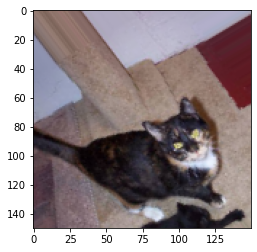

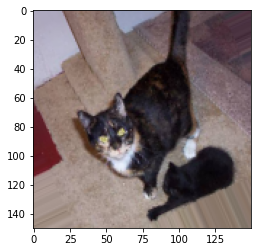

In [ ]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

train_cats_dir = os.path.join(train_dir, 'cats')
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

print(fnames[1])
# We pick one image to "augment"
img_path = fnames[1]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break

plt.show()

In [ ]:
# 設定批量生成器

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2, 
                                   zoom_range=0.5,
                                   fill_mode="nearest")

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# 讀取資料集+批量生成器，產生每 epoch 訓練樣本

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        )

Found 3067 images belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        )

# class_mode

# "categorical" will be 2D one-hot encoded labels
# "binary" will be 1D binary labels
# "sparse" will be 1D integer labels
# "input" will be images identical to input images (mainly used to work with autoencoders)

Found 1120 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

model.save('cats_dogs_horses.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
100/100 [==============================] - 148s 1s/step - loss: 1.5291 - accuracy: 0.4245 - val_loss: 0.9173 - val_accuracy: 0.4950
Epoch 2/20
100/100 [==============================] - 141s 1s/step - loss: 1.0003 - accuracy: 0.4965 - val_loss: 1.0079 - val_accuracy: 0.4450
Epoch 3/20
100/100 [==============================] - 134s 1s/step - loss: 0.9879 - accuracy: 0.5015 - val_loss: 1.4216 - val_accuracy: 0.3690
Epoch 4/20
100/100 [==============================] - 137s 1s/step - loss: 0.9170 - accuracy: 0.5481 - val_loss: 0.8764 - val_accuracy: 0.5730
Epoch 5/20
100/100 [==============================] - 135s 1s/step - loss: 0.8598 - accuracy: 0.5727 - val_loss: 0.9264 - val_accuracy: 0.5280
Epoch 6/20
100/100 [==============================] - 135s 1s/step - loss: 0.8475 - accuracy: 0.5915 - val_loss: 0.7735 - val_accuracy: 0.6100
Epoch 7/20
100/100 [==============================] - 136s 1s/step - loss: 0.8633 - accuracy: 0.5785 - val_loss: 0.9200 - val_accuracy: 0.5860

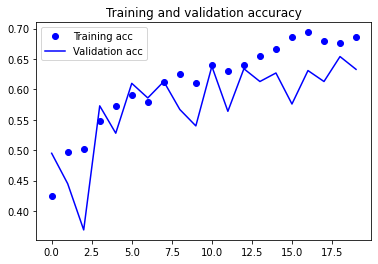

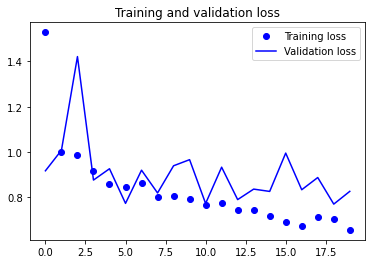

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accu.png')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png')

plt.show()